In [58]:
import os
import pandas as pd

FILE_NAME = "housing.data"

file_path = os.path.join(os.getcwd(), FILE_NAME)

housing_dataframe = pd.read_csv(file_path, header=None, sep='\s+')
housing_dataframe.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                        'RM', 'AGE', 'DIS', 'RAD',
                        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


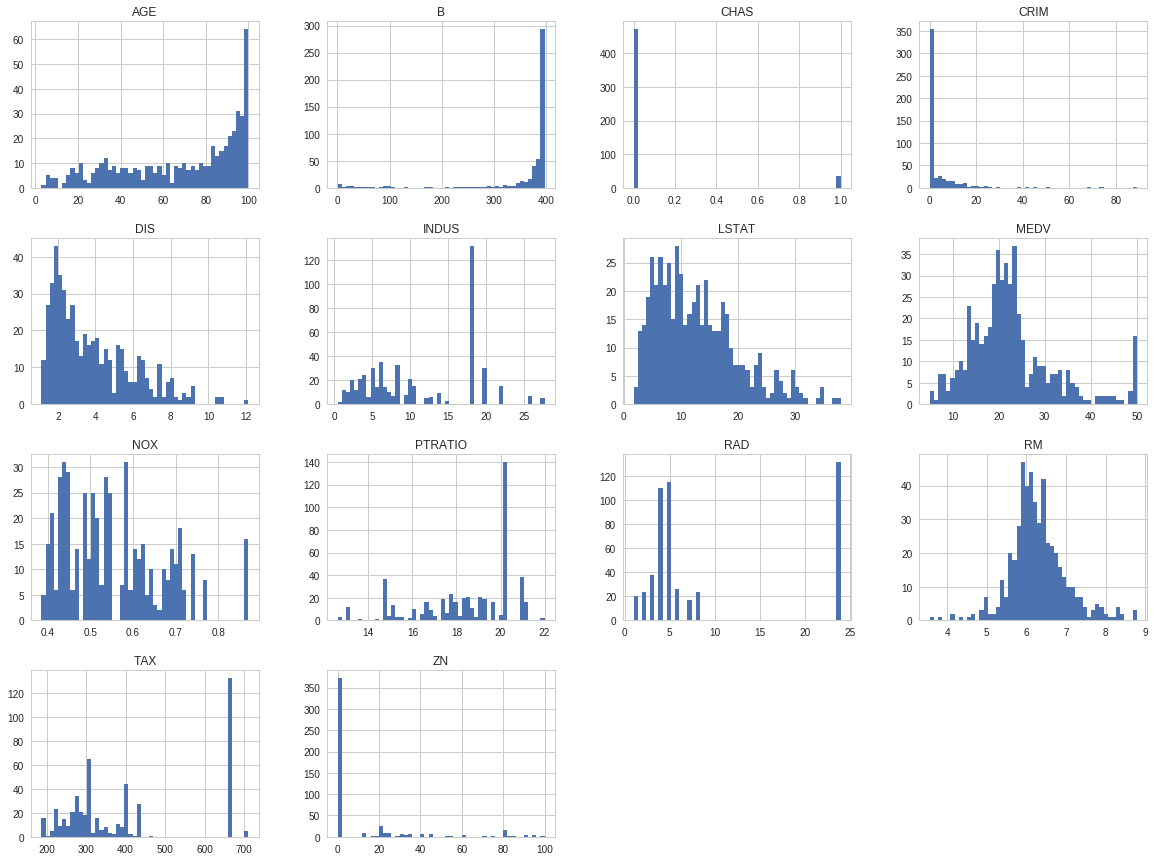

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_dataframe.hist(bins=50, figsize=(20,15))
plt.show()


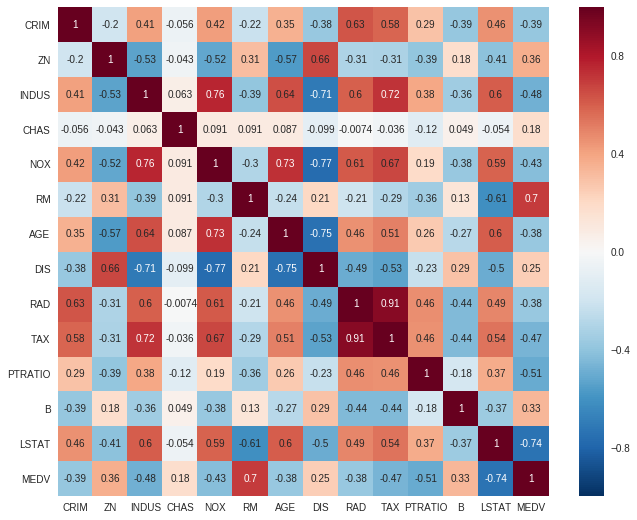

In [60]:

def looking_correlations():
    corr_matrix = housing_dataframe.corr()
    corr_matrix["MEDV"].sort_values(ascending=False)
    f, ax = plt.subplots(figsize=(11,9))
    sns.heatmap(corr_matrix, annot=True)
    
looking_correlations()

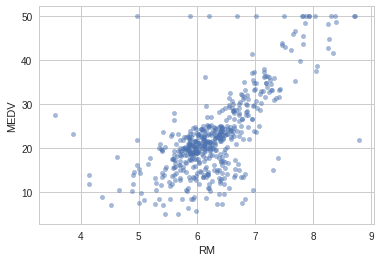

In [61]:
housing_dataframe.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)

In [68]:
from sklearn.linear_model import LinearRegression

X = housing_dataframe[['RM']].values
y = housing_dataframe[['MEDV']].values

lr_reg = LinearRegression()
lr_reg.fit(X,y)
print "[#] Steigung: %.3f" % lr_reg.coef_[0]



[#] Steigung: 9.102


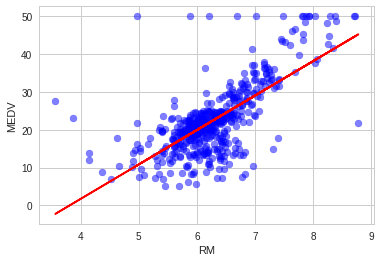

In [72]:
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(X,y,c='b', alpha=0.5)
plt.plot(X,lr_reg.predict(X), c='r')


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing_dataframe.iloc[:, :-1].values
y = housing_dataframe['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
#X = sc_x.fit_transform(X)
#y = sc_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=0)

In [180]:
X_train[:1]

array([[   1.62864,    0.     ,   21.89   ,    0.     ,    0.624  ,
           5.019  ,  100.     ,    1.4394 ,    4.     ,  437.     ,
          21.2    ,  396.9    ,   34.41   ]])

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print "[#] Steigung: %.3f" % model.coef_[0]

model.fit(X,y)

[#] Steigung: -0.121


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

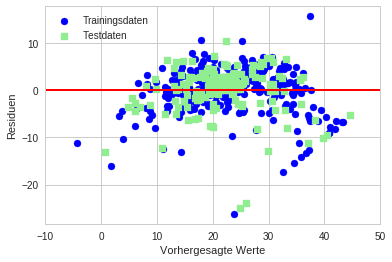

In [182]:
import matplotlib.pyplot as plt

def residual_plot(y_train, y_train_pred, y_test, y_test_pred):
    plt.scatter(y_train_pred, y_train_pred - y_train,
                c='blue', marker='o', label='Trainingsdaten')
    plt.scatter(y_test_pred, y_test_pred - y_test,
                c='lightgreen', marker='s', label='Testdaten')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
    plt.xlim([-10,50])
    plt.show()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
residual_plot(y_train, y_train_pred, y_test, y_test_pred)

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print "R2-Trainingsdaten: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print "MSE-Trainingsdaten: %.3f, test: %.3f" % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))

R2-Trainingsdaten: 0.762, test: 0.690
MSE-Trainingsdaten: 20.200, test: 25.843
